In [36]:
import os
import numpy as np
from keras.preprocessing import image
from PIL import UnidentifiedImageError
from keras.models import load_model
test_data_dir = 'Images/test1'
class_names = ['Rs.10', 'Rs.100', 'Rs.20', 'Rs.200', 'Rs.2000', 'Rs.50', 'Rs.500']
model2 = load_model("curr.h5")
test_images = []
test_labels = []

for class_name in class_names:
    class_dir = os.path.join(test_data_dir, class_name)
    class_index = class_names.index(class_name)
    
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        try:
            img = image.load_img(img_path, target_size=(256, 256))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = img_array / 255.0
            test_images.append(img_array)
            test_labels.append(class_index)
        except UnidentifiedImageError:
            print(f"Skipping file: {img_path}")
            continue

test_images = np.vstack(test_images)
test_labels = np.array(test_labels)

predictions = model2.predict(test_images)
predicted_class_indices = np.argmax(predictions, axis=1)
predicted_class_names = [class_names[index] for index in predicted_class_indices]

accuracy = np.sum(predicted_class_indices == test_labels) / len(test_labels)
print("Test Accuracy:", accuracy)

Skipping file: Images/test1/Rs.10/.DS_Store
Skipping file: Images/test1/Rs.100/.DS_Store
Skipping file: Images/test1/Rs.20/.DS_Store
Skipping file: Images/test1/Rs.200/.DS_Store
Skipping file: Images/test1/Rs.2000/.DS_Store
Skipping file: Images/test1/Rs.50/.DS_Store
Skipping file: Images/test1/Rs.500/.DS_Store
99/99 [==============================] - 14s 139ms/step
Test Accuracy: 0.9017800381436745


In [37]:
# Performance metrics calculation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy = accuracy_score(test_labels, predicted_class_indices)
precision = precision_score(test_labels, predicted_class_indices, average='weighted')
recall = recall_score(test_labels, predicted_class_indices, average='weighted')
f1 = f1_score(test_labels, predicted_class_indices, average='weighted')

print("Test Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Classification report
print("\nClassification Report:")
print(classification_report(test_labels, predicted_class_indices, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(test_labels, predicted_class_indices)
print("\nConfusion Matrix:")
print(cm)

# Class-wise accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\nClass-wise Accuracy:")
for i in range(len(class_names)):
    print(f"{class_names[i]}: {class_accuracy[i]:.2f}")

Test Performance:
Accuracy: 0.9017800381436745
Precision: 0.9080442611650303
Recall: 0.9017800381436745
F1-score: 0.9018007114090644

Classification Report:
              precision    recall  f1-score   support

       Rs.10       0.91      0.84      0.87       486
      Rs.100       0.82      0.98      0.90       466
       Rs.20       1.00      0.87      0.93       450
      Rs.200       0.86      0.99      0.92       449
     Rs.2000       0.94      0.93      0.94       445
       Rs.50       0.86      0.85      0.85       421
      Rs.500       0.97      0.86      0.91       429

    accuracy                           0.90      3146
   macro avg       0.91      0.90      0.90      3146
weighted avg       0.91      0.90      0.90      3146


Confusion Matrix:
[[406   8   1  27   1  35   8]
 [  2 458   0   3   1   1   1]
 [ 18   1 390  20  15   6   0]
 [  0   4   0 444   0   1   0]
 [  0  16   0  16 413   0   0]
 [  3  52   0   3   1 359   3]
 [ 16  17   0   5   7  17 367]]

Class-wi

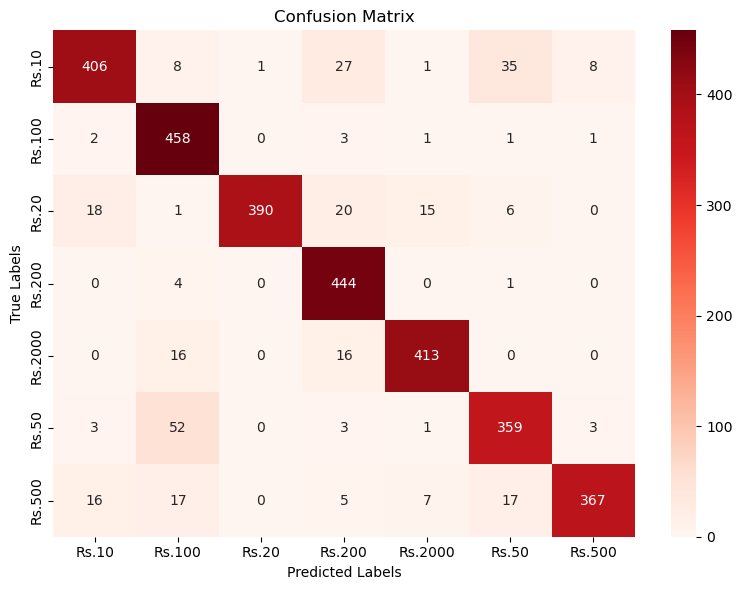

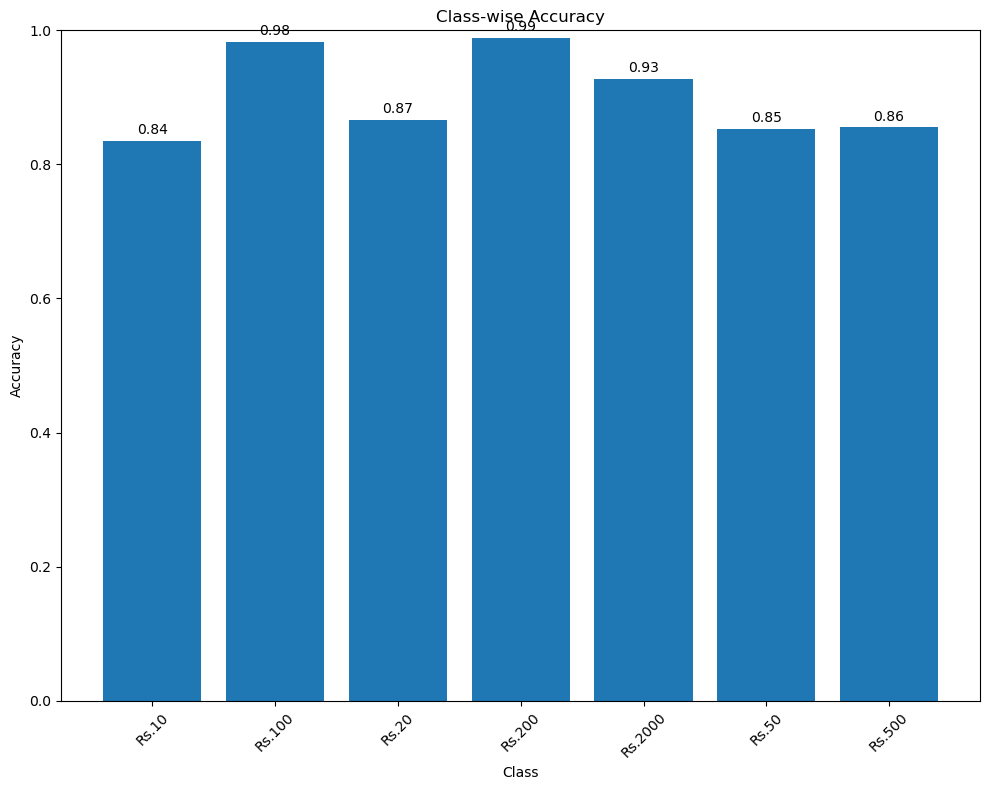

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()


plt.figure(figsize=(10, 8))
plt.bar(class_names, class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
for i, v in enumerate(class_accuracy):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.savefig('class_wise_accuracy.png')
plt.show()